## In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow
More specifically, we're going to cover:
- Introduction to tensors
- Getting information from tensors
- Manipulating tensors
- Tensors & NumPy
- Using@tf.function (a way to speed up your regular Python functions)
- Using GPUs with TensorFlow (or TPUs)
- Exercise to try for yourself

# Introduction to Tensors

In [1]:
# İmport TensorFlow
import tensorflow as tf
print(tf.__version__)

2.20.0


In [3]:
# Create tensors with tf.constant()
scalar = tf.constant(8)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [4]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)

scalar.ndim 

0

In [5]:
# create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
# check the dimension of our vector
vector.ndim 

1

In [7]:
# create a matrix (has more than 1 dimension)
matrix = tf.constant([
    [10,7],
    [7,10]
    ])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [8]:
matrix.ndim 

2

In [9]:
# create another matrix
another_matrix = tf.constant([
    [10., 7.], [3., 2.], [8., 7.]
], dtype=tf.float16) # specify the data type with dtype


In [10]:
# what's the number of dimensions of another_matrix?
another_matrix.ndim 

2

In [11]:
# let's create a tensor
tensor = tf.constant([
    [[1,2,3],
    [4,5,6]],

    [[7,8,9],
    [10,11,12]],

    [[13,14,15],
    [16,17,18]]
])

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [12]:
tensor.ndim 

3

what we've created so far:
* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* matrix: a 2-dimensional array of numbers
* Tensor an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

# Changeable & Unchangeable tensors

creating Tensors with tf.Variable

In [13]:
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [14]:
# Let's try change one of the elements in our changeable tensors

changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
# How about we try .assign()
changeable_tensor[0].assign(7) 
changeable_tensor

In [ ]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

# Creating random tensors
Random tensors are tensors of some arbitrary size which contain random numbers.

In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42)# set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))

random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))


#are they equal?
print(random_1)
print(random_2)
print("\n",random_1==random_2)



# Shuffle the order of elements in a tensor

In [ ]:
# shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't affect learning)

not_shuffled = tf.constant([
    [10,7],
    [3,4],
    [2,5]
])

# shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

In [ ]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

🛠️ **Exercise:** Read through TensorFlow documentation on random seed generation:
https://www.tensorflow.org/api_docs/python/tf/random/set_seed and practice writing 5 random tensors and shuffle them

## My answer

In [ ]:
random_1 = tf.random.Generator.from_seed(7).normal(shape=(2,3))
random_2 = tf.random.Generator.from_seed(42).normal(shape=(2,3))

tf.random.set_seed(7)
random_3 = tf.random.Generator.from_seed(7).normal(shape=(2,3))
random_4 = tf.random.Generator.from_seed(42).normal(shape=(2,3))

random_5 = tf.random.Generator.from_non_deterministic_state().normal(shape=(2,3))



shuffled_1 = tf.random.shuffle(random_1)
print(shuffled_1)
print()

shuffled_2 = tf.random.shuffle(random_2, seed=42)
print(shuffled_2)
print()

shuffled_3 = tf.random.shuffle(random_3, seed=7)
print(shuffled_3)
print()


tf.random.set_seed(42)
shuffled_4 = tf.random.shuffle(random_4, seed=42)
print(shuffled_4)
print()

shuffled_5 = tf.random.shuffle(random_5, seed=7)
print(shuffled_5)

## Explanation

> rule 4: It looks like "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

In [ ]:
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed

## Other ways to make tensors

In [ ]:
tf.ones([10,7])

In [ ]:
# create a tensor of all zeros
tf.zeros([3,4])

### Turn NumPy array into tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing)

In [5]:
# You can also turn Numpy arrays into tensors
import numpy as np

numpy_A = np.arange(1,25, dtype = np.int32) # create a numpty array between 1 and 25.
numpy_A
# X = tf.constant(some_matrix) # capital for matrix or tensor
# Y = tf.constant(vector) # non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A)
B = tf.constant(numpy_A, shape=(2,3,4))
C = tf.constant(numpy_A, shape=(3,8))

print((2*3*4), (3*8))

print()
print(A)
print()
print(B)
print()
print(C)


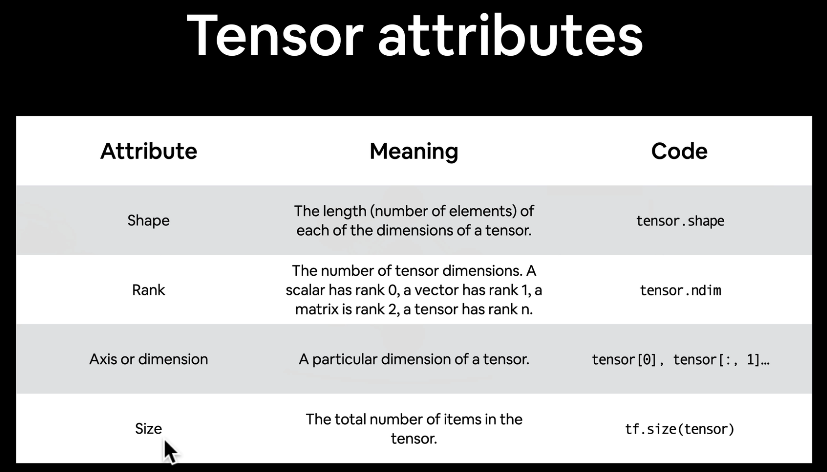

In [3]:
def show(filename):
    from IPython.display import Image, display
    display(Image(filename=filename))

show("tensor_attributes.png")

### Getting more information from tensors

when dealing with tensors you probably want to be aware of the following attributes:

* shape
* rank
* Axis or dimension
* size

In [ ]:
# Create  a rank 4 tensors (4 dimensions)
rank_4_tensor = tf.zeros(shape=(2,3,4,5))
rank_4_tensor

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

In [ ]:
2*3*4*5

In [ ]:
# Get various attributes of our tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions(rank):", rank_4_tensor.ndim)
print("shape of our tensor", rank_4_tensor.shape)
print("Elements along the 0 axis", rank_4_tensor.shape[0])
print("Elements along the last axis", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor", tf.size(rank_4_tensor))
print("Total number of elements in our tensor", tf.size(rank_4_tensor).numpy()) 



### Indexing tensors

Tensors can be indexed just like Python lists.

In [ ]:
some_list = [1,2,3,4]
some_list[:2]

In [ ]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

In [ ]:
some_list[:1]

In [ ]:
# Get the first elements form each dimensions from each index except the final one
rank_4_tensor[:1, :1, :1]

In [ ]:
rank_4_tensor[:1, :1, :1, :]

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7], 
                            [3,4]])
rank_2_tensor.shape, rank_2_tensor.ndim 

In [ ]:
rank_2_tensor

In [ ]:
some_list, some_list[-1]

In [ ]:


# Get the last item of each of row of our rank 2 tensor
rank_2_tensor[:,-1] 

In [ ]:
rank_3_tensor = rank_2_tensor[..., tf.newaxis] 

# Alternative to `tf.newaxis`

In [ ]:
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

In [ ]:
tf.expand_dims(rank_2_tensor, axis=-1) # expand the 0-axis

In [ ]:
rank_2_tensor

### Manipulating tensors (tensor operations)

**Basic Operations**

`+`, `-`, `*`, `/`

In [17]:
# You can add values to a tensor using the addition operator

tensor = tf.constant([[10,7], [3,4]])
tensor+10 #type:ignore


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [18]:
# Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [19]:
# Multiplication also works
tensor * 10 #type:ignore

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [20]:
# Substraction if you want
tensor-10 #type:ignore

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [21]:
#we can use the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [22]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

### Matrix Multiplication
In Machine Learning, matrix multiplication is one of the most common tensor operations

There are two rules our tensors (or matrices) need to fulfil if we're going to matrix multiply them:

1. The inner dimension must match
2. The resulting matrix has the shape of the outer dimension

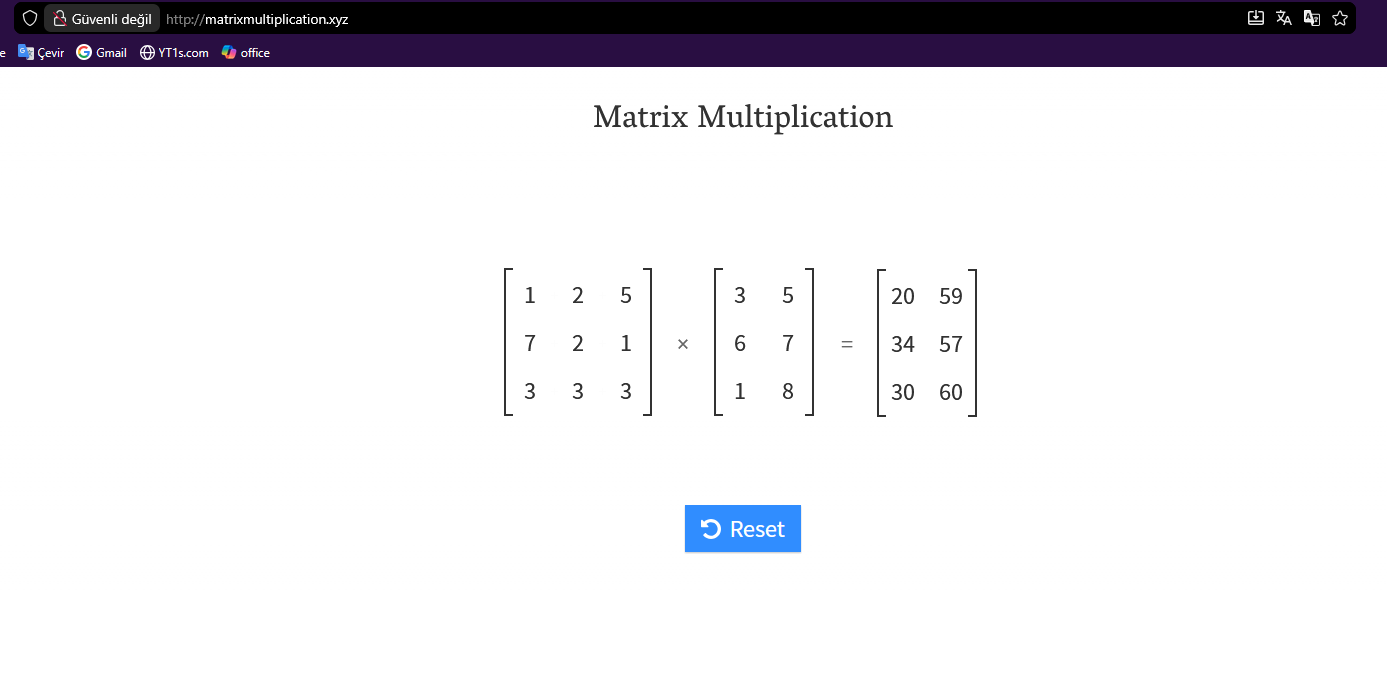

In [1]:
show("matrix_multiplication.png")

Test here: http://matrixmultiplication.xyz/

In [24]:
# Matrix multiplication  in TensorFlow
tensor = tf.constant([[10,7], [3,4]])
tf.matmul(tensor, tensor) # matmul -> matrix multiplication

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [7]:
# Matrix multiplication with python operator "@"
# Create a tensor (3,2) tensor
x = tf.constant([[1,2],
                 [3,4],
                 [5,6]])

# Create another (3,2) tensor
y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
x,y


(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [26]:
print(x @ y)
print(tf.matmul(x, y))

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

**📖Resource** Info and example of matrix multiplication: https://www.mathsisfun.com/algebra/matrix-multiplying.html

**📖Turkish Easy Resource** : https://www.youtube.com/watch?v=8gDh7MO7yo8&t=57s

follow these resources and solve the problem

### My Solution

The number of columns in X (2) and the number of rows in Y (3) must be the same, the operation is invalid

In [8]:
new_tensor = tf.reshape(x, [2,3])
new_tensor, y


(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

Now the rule is satisfied, we can multiply.

In [10]:
print(new_tensor @ y)
print(tf.matmul(new_tensor, y))

tf.Tensor(
[[ 58  64]
 [139 154]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 58  64]
 [139 154]], shape=(2, 2), dtype=int32)


### Solution

In [11]:
x.shape, tf.reshape(y,shape = (2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [12]:
# Try To multiply X by reshaped Y
x @ tf.reshape(y,shape = (2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [13]:
tf.matmul(x, tf.reshape(y,shape = (2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [14]:
# let's reverse it and try if it's work or not
tf.matmul(tf.reshape(x,shape = (2,3)),y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

**📖Resource:** info and example of matrix multiplication: https://www.mathsisfun.com/algebra/matrix-multiplying.html

**The dot product**

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`


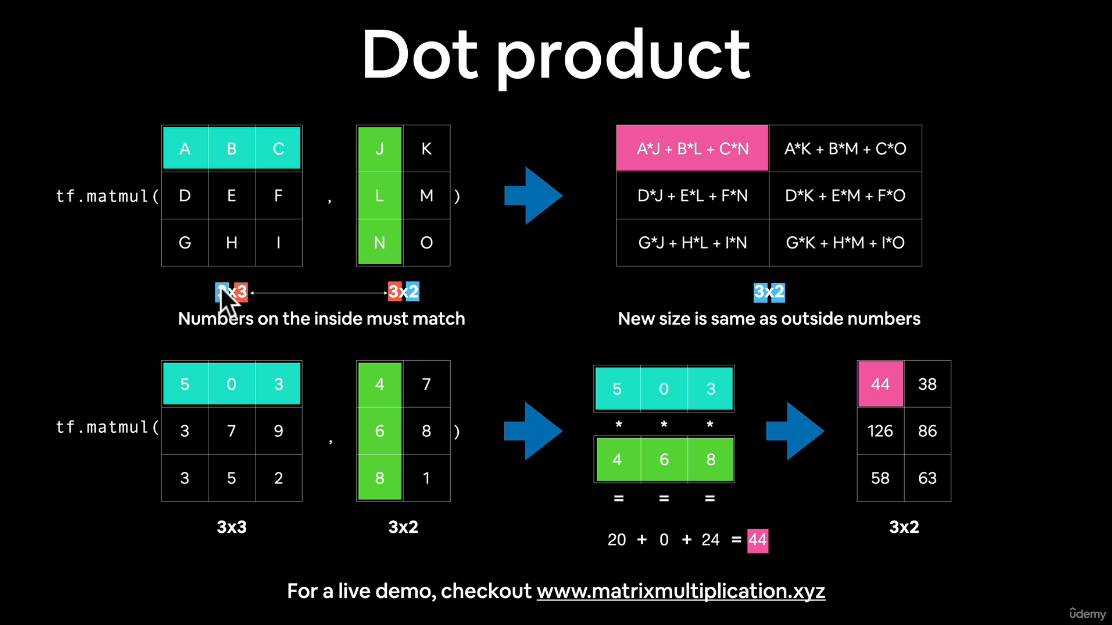

In [4]:
show("dot_product.png")

In [15]:
x,y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [17]:
# Preform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(x), y, axes = 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [18]:
# preform matrix multiplication between x and y (transposed)
tf.matmul(x, tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [19]:
# preform matrix multiplication between x and y (reshaped)
tf.matmul(x, tf.reshape(y, shape = (2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [20]:
# Check the value of y, reshape y and transpose y
print("Normal Y:")
print(y, "\n")

print("Y reshaped to (2,3):")
print(tf.reshape(y, (2,3)), "\n")

print("Y transposed:")
print(tf.transpose(y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [21]:
tf.matmul(x, tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

Generally, when preforming matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensors to satisfy the matrix multiplication rules.

### Change the datatype of a tensor

In [7]:
# Create a new tensor with default dtype (float32)
B = tf.constant([1.7, 7.4])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [14]:
C = tf.constant([7,10])
C, C.dtype

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>,
 tf.int32)

In [10]:
# Change from float32 to float16 (reduced prediction)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [13]:
# Change from int32 to float32
E = tf.cast(C, dtype =tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

### Aggregation tensors
Aggregation tensors = condensing them from multiple values down to a smaller amount of values.

In [3]:
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [4]:
# Get the Absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's Go through the following forms of aggregation:
- Get the minimum
- Get the maximum
- Get the mean of a tensor
- Get the sum of a tensor

In [5]:
# Create a random tensor with values between 0 and 100 of size 50
import numpy as np
E = tf.constant(np.random.randint(0,100, size = 50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 3, 72, 76, 94, 59, 23, 86, 50, 46, 68, 53, 23, 91, 34, 45, 42,  4,
       45, 97, 77, 62, 23, 14, 47, 54, 74, 76, 99, 30, 35, 32,  6, 60,  0,
       55, 48,  9,  7, 47, 81, 53, 39, 52, 47, 31, 23, 72, 53, 20, 42],
      dtype=int32)>

In [6]:
# Finding the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [7]:
# Finding the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int32, numpy=99>

In [8]:
# Finding the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int32, numpy=47>

In [13]:
# Finding the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int32, numpy=2379>

**🛠️Exercise:** With what we've just learned, find the variance and standard deviation of our `E` tensor using TensorFlow methods.

### My Solution

In [26]:
# Finding the variance

F = tf.cast(E,dtype=tf.float16)
tf.math.reduce_variance(F)

<tf.Tensor: shape=(), dtype=float16, numpy=677.0>

In [25]:
# Finding the standard deviation

G = tf.cast(E,dtype=tf.float16)
tf.math.reduce_std(G, axis=0)

<tf.Tensor: shape=(), dtype=float16, numpy=26.015625>

### Solution

In [34]:
#to find the variance of our tensor we need access to tensorflow_probability
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int32, numpy=677>

In [29]:
#Find the standard deviation
G = tf.cast(E,dtype=tf.float16)
tf.math.reduce_std(G, axis=0)

<tf.Tensor: shape=(), dtype=float16, numpy=26.015625>

### Find the positional maximum and minimum

### My codes

In [ ]:
#Find the positional maximum
tf.math.argmax(E)

In [36]:
#Find the positional minimum
tf.math.argmin(E)

<tf.Tensor: shape=(), dtype=int64, numpy=33>

### Course answers

In [3]:
# Create a tensor for finding positional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [4]:
# Finding the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [5]:
# index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [10]:
# check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [11]:
# finding the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [13]:
 # Finding the minimum using the positional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463667869567871>

### My practice

In [5]:
my_tensor = tf.random.uniform(shape=[30])
my_tensor

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([0.94171524, 0.55743396, 0.8556433 , 0.6159345 , 0.46901822,
       0.8895985 , 0.7122812 , 0.1618129 , 0.47236228, 0.6571028 ,
       0.6651621 , 0.08300233, 0.38292658, 0.7146063 , 0.5662216 ,
       0.00161326, 0.8140986 , 0.5667138 , 0.564132  , 0.73125017,
       0.31526017, 0.08005798, 0.77495515, 0.30674326, 0.36436117,
       0.31716275, 0.60858667, 0.18482399, 0.12400901, 0.86392426],
      dtype=float32)>

In [6]:
# find positional max and positional min
p_min = tf.argmin(my_tensor)
p_max = tf.argmax(my_tensor)

p_min_value = my_tensor[tf.argmin(my_tensor)]
p_max_value = my_tensor[tf.argmax(my_tensor)]

print(p_min, p_max)
print(p_min_value, p_max_value)

tf.Tensor(15, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0.0016132593, shape=(), dtype=float32) tf.Tensor(0.94171524, shape=(), dtype=float32)


### Squeezing a tensor (removing all singe dimensions)

In [7]:
# Create a tensor to get started
G = tf.constant(tf.random.uniform(shape=[50]),shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.44456577, 0.6568558 , 0.77158225, 0.17455387, 0.35418963,
           0.7900189 , 0.29549193, 0.58489466, 0.88532686, 0.5331352 ,
           0.47399616, 0.52730775, 0.04781473, 0.10604703, 0.25711262,
           0.45473623, 0.82382727, 0.52957153, 0.9624163 , 0.457317  ,
           0.1670314 , 0.85558546, 0.8592348 , 0.4868554 , 0.08832991,
           0.93749046, 0.9921166 , 0.00342941, 0.94758296, 0.19144905,
           0.5567311 , 0.9699787 , 0.6150001 , 0.45300972, 0.346349  ,
           0.6965648 , 0.5462519 , 0.8034383 , 0.9964559 , 0.8301569 ,
           0.66264355, 0.39337897, 0.40617156, 0.06974816, 0.40496206,
           0.09413993, 0.74327826, 0.24492526, 0.23181272, 0.33854115]]]]],
      dtype=float32)>

In [8]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [9]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.44456577, 0.6568558 , 0.77158225, 0.17455387, 0.35418963,
        0.7900189 , 0.29549193, 0.58489466, 0.88532686, 0.5331352 ,
        0.47399616, 0.52730775, 0.04781473, 0.10604703, 0.25711262,
        0.45473623, 0.82382727, 0.52957153, 0.9624163 , 0.457317  ,
        0.1670314 , 0.85558546, 0.8592348 , 0.4868554 , 0.08832991,
        0.93749046, 0.9921166 , 0.00342941, 0.94758296, 0.19144905,
        0.5567311 , 0.9699787 , 0.6150001 , 0.45300972, 0.346349  ,
        0.6965648 , 0.5462519 , 0.8034383 , 0.9964559 , 0.8301569 ,
        0.66264355, 0.39337897, 0.40617156, 0.06974816, 0.40496206,
        0.09413993, 0.74327826, 0.24492526, 0.23181272, 0.33854115],
       dtype=float32)>,
 TensorShape([50]))